In [ ]:
#Train, val, Test splitter
import train_pytorch
import prepare_dataset
import random
import time 
from collections import Counter
import os
import numpy as np
import shutil
#os.chdir("/Users/kjartan/Documents/CompCogSci3/") 
os.chdir(r"C:\Users\kjart\OneDrive\Dokumenter\KU\3. semester\Cog sci 3\CompCogSci3")

In [ ]:
language = "EN"
unsorted_data_dir = "raw_data/derivatives/"
annotation_file = f"raw_data/annotation/{language}/lppEN_word_information.csv"
random.seed(1234)

#prepare_dataset.clear_data_dir()
##the split is (0.8,0.1,0.1)
#prepare_dataset.fill_data_dir(unsorted_data_dir, prepare_dataset.config1, language)


In [15]:
#Move data back from aux_data/
for phase in os.listdir("aux_data/"):
    for run in range(9):
        path = f"aux_data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            file_path = f"data/{phase}/{run}/{language}/{file}"
            shutil.move(f"aux_data/{phase}/{run}/{language}/{file}",file_path)
            #time.sleep(0.00001)

In [16]:
pos = "NUM"

oov = "-1"
binary = False

prepare_dataset.prepare_labels(annotation_file, "data/", language, pos=pos, oov=oov)

#binary = prepare_dataset.convert_to_binary_labels("data/", oov, language)

{0: ['six', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', 'one', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'two', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', 'one', 'two', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'one', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'one', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'two', '-1', 'one', '-1'

In [17]:
all_labels = []
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                    for l in lines:
                        all_labels.append(l.strip("\n"))

from collections import Counter
most_common = Counter(all_labels).most_common()
label_dict = {}
with open("label_dict.txt", "r") as f:
    for i in f.readlines():
        k = i.split("=")
        label_dict[k[1].strip("\n ")] = k[0]
most_common_lemmas = []
for i in range(len(most_common)):
    lbl = most_common[i][0]
    most_common_lemmas.append((label_dict[lbl], most_common[i][1]))

vocab15 = []
for w, _ in most_common_lemmas[2:17]: #top 15 words
    vocab15.append(w.strip())
    
print(vocab15)
print(most_common_lemmas[2:17])

['thousand', 'three', 'six', 'million', 'four', 'two', '612', 'five', 'eleven', 'hundred', 'twenty', '325', 'forty', 'thirty', 'billion']
[('thousand ', 405), ('three ', 405), ('six ', 324), ('million ', 297), ('four ', 270), ('two ', 216), ('612 ', 216), ('five ', 189), ('eleven ', 162), ('hundred ', 135), ('twenty ', 108), ('325 ', 81), ('forty ', 81), ('thirty ', 81), ('billion ', 81)]


In [18]:
vocab = vocab15
prepare_dataset.prepare_handpicked_labels(annotation_file, "data/", vocab, oov=oov)

{0: ['six', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'two', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', 'two', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'six', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'thousand', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 'two', '-1', '-1', '-1', '-1

In [19]:
#Exclude data that corresponds to oov
with open("label_dict.txt", "r") as f:
    for i in f.readlines():
        k = i.split("=")
        if k[0].strip() == oov:
            label_2_remove = int(k[1].strip("\n "))
            break
print(label_2_remove)
labels_dict = {}
for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                labels = np.loadtxt(f"data/{i}/{run}/{language}/labels.txt")
                labels_dict[run] = labels

exclusion_idxs = {k:[] for k in range(9)}

for run in labels_dict.keys():
    for idx, label in enumerate(labels_dict[run]):
        if label==label_2_remove:
            exclusion_idxs[run].append(idx)


for i in os.listdir("data"):
    if os.path.isdir("data/"+i):
        for phase in os.listdir("data/"+i):
            for run in range(9):
                path = f"data/{i}/{run}/{language}/labels.txt"
                with open(path, "r") as f:
                    lines = f.readlines()
                with open(path, "w") as f:
                    for line in lines:
                        if line.strip("\n ") != str(label_2_remove):
                            f.write(line)

count = 0
for phase in os.listdir("data/"):
    for run in range(9):
        path = f"data/{phase}/{run}/{language}/"
        for file in os.listdir(path):
            if file.endswith(".txt"):
                continue
            file_path = f"data/{phase}/{run}/{language}/{file}"
            idx = file.split("_")[-1][:-4]
            if int(idx) in exclusion_idxs[run]:
                count +=1 
                dest = f"aux_data/{phase}/{run}/{language}/"
                if not os.path.exists(dest):
                    os.makedirs(dest)
                shutil.move(file_path, f"aux_data/{phase}/{run}/{language}/")
                #time.sleep(0.00001)
print("moved ", count, " files")


5
moved  127296  files


In [20]:

def count_files():
    counts = {}
    # Iterate directory
    for phase in os.listdir("data"):
        if os.path.isdir("data/"+phase):
            count=0
            for run in os.listdir(f"data/{phase}/"):
                for file in os.listdir(f"data/{phase}/{run}/{language}"):
                    if file.endswith(".npy"):
                        count += 1
        counts[phase] = count
    return counts

count_files()

{'Test': 768, 'Train': 4864, 'Val': 512}

In [21]:
import json
with open("config_stats.txt", "a") as f:
    f.write("\n")
    for i in most_common_lemmas[2:17]:
        f.write(str(i) + ", ")
    f.write("\n")
    f.write(json.dumps(count_files()))
    f.write("\n")
f.close()

2022-12-06 21:58:47.645111
cuda
Epoch 1/15
-------------
{'train': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBAD40>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBBCA0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x00000211DF5D3310>}
##### train Loss: 2.7797 Acc: 0.0748 #####
{'train': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBAD40>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBBCA0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x00000211DF5D3310>}
##### valid Loss: 2.7274 Acc: 0.1211 #####
Epoch 2/15
-------------
{'train': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBAD40>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x00000211E4BBBCA0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x00000211DF5D3310>}
##### train Loss: 2.6682 Acc: 0.1285 #####
{'train': <torch.utils.data.dataloader.DataLoader object at 0x0000021

  0%|          | 0/16 [00:00<?, ?it/s]

Test Accuracy: 0.1250


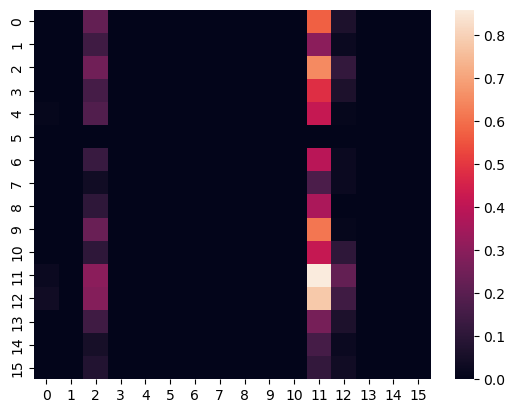

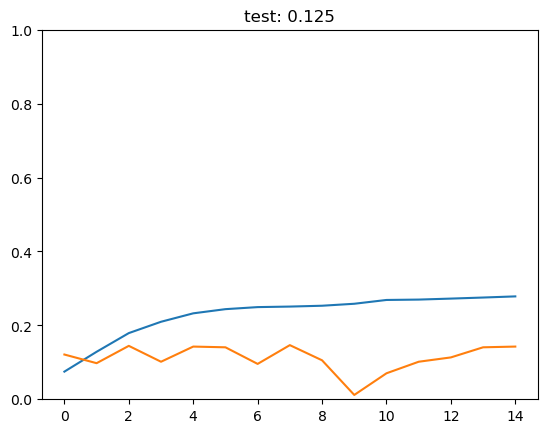

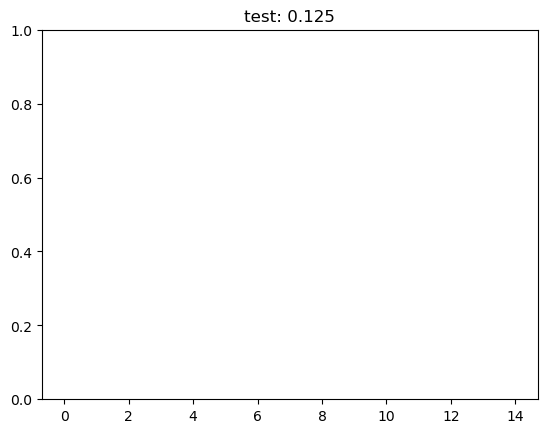

0:12:25.612592


In [23]:
batch_size=50
config = f"config1_{language}_top15{pos}"
train_pytorch.train(binary=False, batch_size = batch_size, num_epochs = 15, config=config, model = "2d")

16


  0%|          | 0/16 [00:00<?, ?it/s]

..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
..
Test Accuracy: 0.1250


(M2DCNN(
   (up_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(73, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
       (5): mish()
       (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (front_conv): Conv2d(
     (conv_block): Sequential(
       (0): Conv2d(90, 16, kernel_size=(3, 3), stride=(1, 1))
       (1): mish()
       (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
       (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)

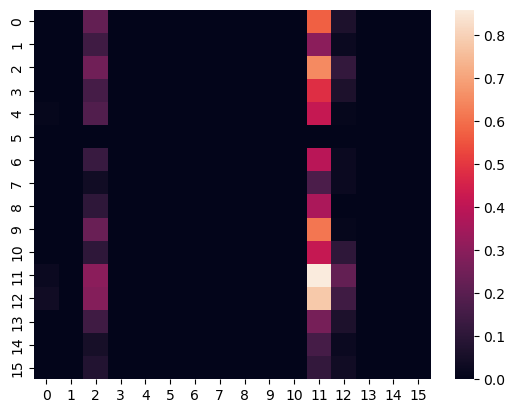

In [24]:
import model_m2dcnn as model
from torch.utils.data import DataLoader
from dataset import lpp_Dataset

batch_size = 50
binary = False
test_dataloader = DataLoader(lpp_Dataset("data/Test/"), batch_size=batch_size, shuffle=False)
if binary:
        nb_classes = 2
else:
    with open("label_dict.txt", "r") as f:
        nb_classes = len(f.readlines())
        f.close()
print(nb_classes)
train_pytorch.test(model.M2DCNN(numClass=nb_classes, numFeatues=30880, DIMX=74, DIMY=90, DIMZ=73), config,f"results/{config}_weights.pth", nb_classes, test_dataloader)